##### 문제1. 유임 승차 비율이 가장 높은 역은 어디일까

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('subwayfee.csv', encoding = 'cp949')
df.shape

(597, 9)

In [9]:
df =df.replace(',', '', regex=True)
df.dropna() #누락값이 있는 행은 버린다

In [12]:
df.head(1)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2019-05,1호선,150,서울역,1568570,1489737,247801,242107,2019-06-03 10:56:20


In [11]:
arr = np.array(df)
arr.shape, arr[0]

((597, 9), array(['2019-05', '1호선', 150, '서울역', '1568570', '1489737', '247801',
        '242107', '2019-06-03 10:56:20'], dtype=object))

In [16]:
유임승차 = arr[:, 4].astype(np.int)
arr[np.argmax(유임승차), 3], np.max(유임승차), np.argmax(유임승차)

('강남', 2894341, 31)

유임승차 비율이 가장 높은 곳은?(유임승차인원/무임승차인원)

In [21]:
무임승차 = arr[:, 6].astype(np.int)
유임승차비율 = 유임승차/(무임승차+1)
arr[np.argmax(유임승차비율), 1:4:2], np.max(유임승차비율), np.argmax(유임승차비율)

(array(['분당선', '복정'], dtype=object), 24.0, 237)

유무임 승하자 인원이 가장 많은 역은 어디일까

In [25]:
전체승하차인원 = arr[:, 4:8].astype(np.int)
역이용인원 = np.sum(전체승하차인원, axis=1)
arr[np.argmax(역이용인원), 1:4:2], np.max(역이용인원), np.argmax(역이용인원)

(array(['2호선', '강남'], dtype=object), 6234453, 31)

모든 역의 유무임 승하차 비율은 어떻게 될까 > 파이(유임승차 45%, 무임하차 x%)


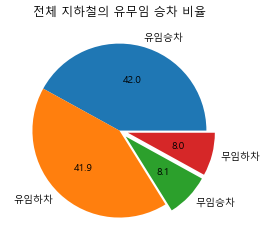

In [32]:
a= np.sum(arr[:, 4:8].astype(np.int), axis=0)
plt.rc('font', family='Malgun Gothic')
n= plt.pie(a, labels=df.columns[4:8], autopct='%.1f', explode=[0,0,0.1,0.1])
plt.title('전체 지하철의 유무임 승차 비율')
plt.savefig('all_subway_ratio.png')

모든 역마다 유무임 승차 비율을 따로 파이 차트로 나타내기
- 50만명 이상 승차하는 곳만

In [36]:
for i in range(len(arr)):
    row = arr[i]
    승하차인원 = row[4:8].astype(np.int)
    유임승차 = 승하차인원[0]
    if 유임승차 > 1000000:
        plt.rc('font', family='Malgun Gothic')
        n= plt.pie(row[4:8], labels=df.columns[4:8], autopct='%.1f', explode=[0,0,0.1,0.1])
        역이름 = row[3]
        파일명 = 'subway_'+ 역이름 + '.png'
        plt.title(역이름 + '역의 유무임 승차 비율')
        plt.savefig(파일명)
        plt.close()